In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('./input/walmart_store_locaction.csv')
data.head(5)

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.108660,-92.436905,NaN,NaN,NaN,NaN,NaN
1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.857394,-89.586051,NaN,NaN,NaN,NaN,NaN
2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.888765,-94.979859,NaN,NaN,NaN,NaN,NaN
3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.354957,-92.341026,NaN,NaN,NaN,NaN,NaN
4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.293955,-95.627125,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            4654 non-null   object 
 1   url             4654 non-null   object 
 2   street_address  4654 non-null   object 
 3   city            4654 non-null   object 
 4   state           4654 non-null   object 
 5   zip_code        4654 non-null   int64  
 6   country         4654 non-null   object 
 7   phone_number_1  4654 non-null   object 
 8   phone_number_2  0 non-null      float64
 9   fax_1           0 non-null      float64
 10  fax_2           0 non-null      float64
 11  email_1         0 non-null      float64
 12  email_2         0 non-null      float64
 13  website         0 non-null      float64
 14  open_hours      4631 non-null   object 
 15  latitude        4654 non-null   float64
 16  longitude       4654 non-null   float64
 17  facebook        0 non-null      f

In [5]:
data.isna().sum()

name                 0
url                  0
street_address       0
city                 0
state                0
zip_code             0
country              0
phone_number_1       0
phone_number_2    4654
fax_1             4654
fax_2             4654
email_1           4654
email_2           4654
website           4654
open_hours          23
latitude             0
longitude            0
facebook          4654
twitter           4654
instagram         4654
pinterest         4654
youtube           4654
dtype: int64

In [6]:
data.drop(columns=['phone_number_2', 'fax_2', 'fax_1', 'email_1', 'email_2', 'website', 'facebook', 'instagram', 'pinterest', 'youtube', 'twitter'], inplace=True)

In [7]:
data.isna().sum()

name               0
url                0
street_address     0
city               0
state              0
zip_code           0
country            0
phone_number_1     0
open_hours        23
latitude           0
longitude          0
dtype: int64

In [12]:
data['open_hours'].value_counts()

monday - friday : 00:00-24:00, saturday : 00:00-24:00, sunday : 00:00-24:00    2778
monday - friday : 06:00-24:00, saturday : 06:00-24:00, sunday : 06:00-24:00    1152
monday - friday : 06:00-23:00, saturday : 06:00-23:00, sunday : 06:00-23:00     227
monday - friday : 07:00-22:00, saturday : 07:00-22:00, sunday : 07:00-22:00     104
monday - friday : 07:00-24:00, saturday : 07:00-24:00, sunday : 07:00-24:00      81
monday - friday : 07:00-23:00, saturday : 07:00-23:00, sunday : 07:00-23:00      72
monday - friday : 06:00-01:00, saturday : 06:00-01:00, sunday : 06:00-01:00      56
monday - friday : 05:00-24:00, saturday : 05:00-24:00, sunday : 05:00-24:00      49
monday - friday : 06:00-22:00, saturday : 06:00-22:00, sunday : 06:00-22:00      48
monday - friday : 00:00-23:59, saturday : 00:00-23:59, sunday : 00:00-23:59      11
monday - friday : 05:00-23:00, saturday : 05:00-23:00, sunday : 05:00-23:00      10
monday - friday : 07:00-21:00, saturday : 07:00-21:00, sunday : 07:00-21:00 

In [13]:
data.country.value_counts()

US    4636
PR      18
Name: country, dtype: int64

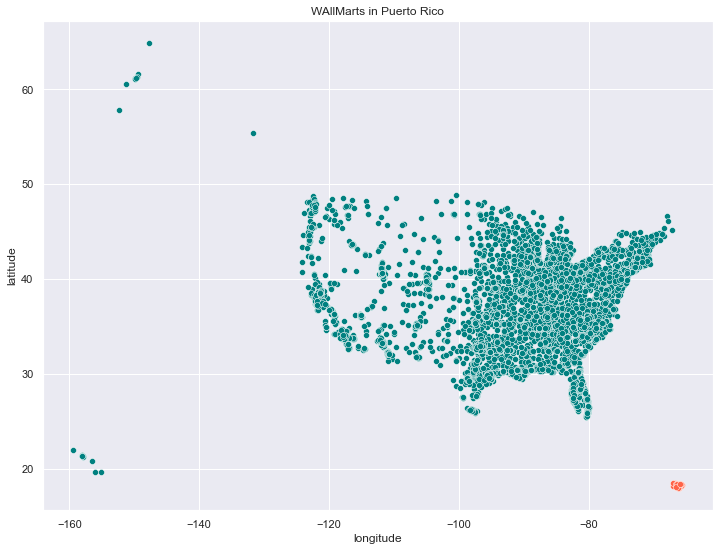

In [17]:
cmap = sns.color_palette(as_cmap=True)
sns.set(rc={'figure.figsize': (12, 9)})
sns.scatterplot(data=data[data['country']=='US'], x="longitude", y="latitude", palette = cmap,  
                sizes=(20, 200), color = ['teal'])

plt.title('WallMArt location')
plt.xlabel('longitude')
plt.ylabel('latitude')

cmap = sns.color_palette('rocket', as_cmap=True)
sns.set(rc={'figure.figsize': (12, 9)})
sns.scatterplot(data=data[data['country']=='PR'], x="longitude", y="latitude", palette = cmap,  
                sizes=(20, 200), color = ['tomato'])

plt.title('WAllMarts in Puerto Rico')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()


In [18]:
data.state.value_counts()

TX    508
FL    333
CA    281
NC    192
GA    188
IL    159
OH    144
TN    139
VA    138
PA    137
MO    137
AL    132
LA    124
OK    122
AR    119
AZ    115
IN    114
SC    110
NY     98
MI     95
KY     93
WI     89
CO     89
MS     77
KS     75
MN     69
WA     67
NJ     62
IA     60
UT     53
MA     48
MD     47
NM     46
OR     44
NV     43
NE     42
WV     38
CT     33
NH     27
ID     26
ME     22
PR     18
SD     15
ND     14
MT     14
WY     12
HI     10
DE      9
RI      9
AK      9
VT      6
DC      3
Name: state, dtype: int64

In [19]:
data.city.value_counts()

San Antonio        29
Houston            26
Orlando            24
Jacksonville       23
Las Vegas          22
                   ..
Brookings           1
Carpentersville     1
Mechanicsville      1
Elizabeth City      1
Millcreek           1
Name: city, Length: 2638, dtype: int64

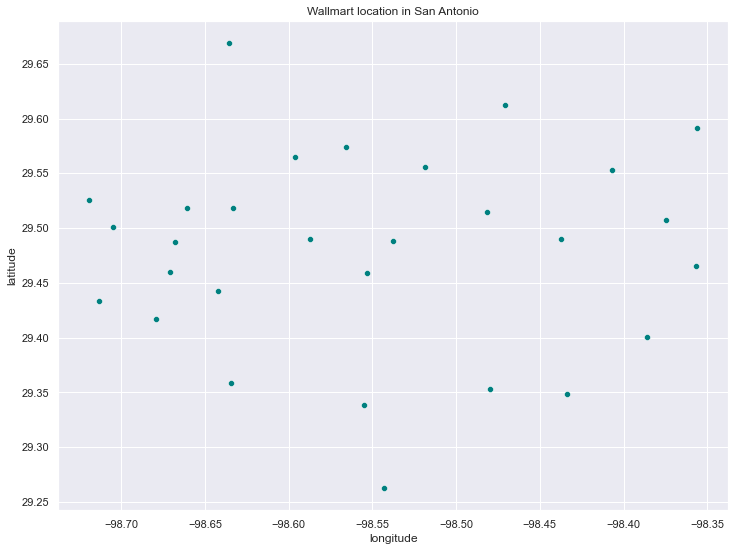

In [21]:
sns.color_palette(as_cmap=True)
sns.set(rc={'figure.figsize': (12, 9)})
sns.scatterplot(data=data[data['city']=='San Antonio'], x="longitude", y="latitude", palette = cmap,  
                sizes=(20, 200), color = ['teal'])

plt.title('Wallmart location in San Antonio')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()